# Introdução a NLP

## Processamento de Linguagem Natural (NLP)
Dados textuais estão em toda parte e você, como empresa ou alguém que esteja trabalhando para lançar um novo produto, pode utilizá-los para validar, melhorar e expandir esses produtos. A ciência que extrai significado e aprendizado de dados textuais disponíveis no mundo é chamada de Processamento de Linguagem Natural (NLP).
NLP produz novos e incríveis resultados diariamente. Além disso, vem sendo estudada e praticada em grande escala. No entanto, a maior parte dos problemas, e não menos importantes, são colocados em prática com maior frequência em relação a outros:
  - Identificar diferentes grupos de usuários/clientes (ex. predizer rotatividade, tempo de vida, preferência de produtos, etc.);
  - Detectar e extrair com precisão diferentes categorias de um feedback (ex. reviews positivos e negativos, menções a determinadas características e atributos, etc.);
  - Classificação textual de acordo com uma intenção (ex. se alguém está requisitando ajuda, se está tendo um problema urgente, se uma notícia é falsa ou verdadeira, etc.).

Este guia irá auxiliar na construção de soluções que envolvem Aprendizado de Máquina (ML). Além disso, depois de acompanhar estas orientações, será possível:
  - Coletar, preparar e inspecionar dados;
  - Construir modelos preditivos simples;
  - Interpretar e entender seus modelos, certificando-se de que ele está aprendendo informações relevantes e não ruído.

## Coletando dados
Todo problema em ML começa com dados, como uma lista de e-mails, postagens em redes sociais ou chats. Algumas fontes são comuns:
  - Revisão de produtos (Amazon, Yelp e App Stores);
  - Conteúdo gerado por usuários (Tweets, Facebook e StackOverflow);
  - Solução de problemas (solicitação de clientes, abertura de chamados, informações de bate-papo).
  - Os dados utilizados neste guia, são dados disponibilizados pela [Figure Eight](https://www.figure-eight.com/). O conjunto de dados é chamado de “Disasters on Social Media” e possui mais de 10.000 tweets que foram selecionados a partir de buscas envolvendo chaves como “em chamas”, “quarentena” e “pandemônio”, relacionando posteriormente o resultado dessas buscas com eventos realmente desastrosos e não desastrosos.A tarefa a ser realizada nestes dados, é identificar um tweet realmente relevante em relação a um desastre. Uma aplicação para a solução que será desenvolvida aqui, em potencial, seria avisar aos bombeiros sobre um desastre que realmente está acontecendo de rapidamente. No entanto, realizar este procedimento contornando uma publicação referente a um filme de ação, por exemplo, que pode conter as mesmas palavras chaves relacionadas com um desatre.A seguir a importação das bibliotecas úteis para o desenvolvimento do guia.

In [128]:
from tensorflow import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import itertools
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import gensim

import plotly.express as px

In [129]:
path  = '/content/drive/MyDrive/atlantico-academy/cognitive-computing'

## Limpando os dados
O primeiro passo é saber examinar os dados para, posteriormente, limpá-los. Um conjunto de dados limpo permitirá que um modelo aprenda apenas recursos significativamente relevantes e não se adeque a ruídos. Ruídos são características do texto que não são significativos para caracterizar o que se pretende avaliar. No exemplo dos tweets, a hashtag (#) usada para compor determinadas palavras em nada caracteriza o texto propriamente dito. Outras características  que precisam ser consideradas na limpeza dos dados são:

- Remover caracteres irrelevantes como os não alfanuméricos;
- Remover palavras que não são relevantes, como as menções indicadas com “@”;
- Converter termos para minúsculos, homogeneizando os dados (OLÁ – olá);
- Combinar palavras escritas incorretamente para uma única representação (legaaalll – legal);
- Considerar lematização (reduzir palavras como “sou”, “é” para uma forma desflexionada como “ser”);
- Quebrar o seu texto em termos.
- Após considerar as opções de limpeza acima, é possível começar a usar os dados para treinar um modelo de predição.

A seguir o código de limpeza dos dados que, na sequência, serão utilizados para treinar o modelo.

In [130]:
# Inspecionando os dados 
questions = pd.read_csv(f"{path}/datasets/socialmedia_relevant_cols.csv") 
questions.columns=['text', 'choose_one', 'class_label']

Dados sem pré-processamento

In [131]:
#Primeiras linhas 
questions.head()

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


In [132]:
questions.tail()

,text,choose_one,class_label
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1
10875,#CityofCalgary has activated its Municipal Eme...,Relevant,1


Estatística descritiva:

In [133]:
questions.describe()

,class_label
count,10876.000000
mean,0.432604
std,0.498420
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


### Limpeza dos dados

In [134]:
'asdadasd'\
.replace('a', '')\
.replace('d', 's')

'sssss'

Função de limpeza

In [135]:
# Expressões regulares para limpeza dos dados 
def standardize_text(df, text_field):    
    df[text_field] = df[text_field].str.\
        replace(r"http\S+", "", regex=True).str.\
        replace(r"http", "", regex=True).str.\
        replace(r"@\S+", "", regex=True).str.\
        replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", regex=True).str.\
        replace(r"@", "at", regex=True).str.\
        lower()
    return df

In [136]:
clean_questions = standardize_text(questions, "text") 
clean_questions.to_csv("clean_data.csv")

## Dados limpos

In [137]:
clean_questions.head()


,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,"heard about earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask canada,Relevant,1


In [138]:
clean_questions.tail()

,text,choose_one,class_label
10871,m1 94 01 04 utc ?5km s of volcano hawaii,Relevant,1
10872,police investigating after an e bike collided ...,Relevant,1
10873,the latest more homes razed by northern calif...,Relevant,1
10874,meg issues hazardous weather outlook (hwo),Relevant,1
10875,cityofcalgary has activated its municipal eme...,Relevant,1


Distribuição das classes

In [139]:
clean_questions["choose_one"].value_counts()

Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: choose_one, dtype: int64

In [140]:
qtd_clean_question = clean_questions["choose_one"].value_counts().\
    to_frame().reset_index().\
    rename(columns={'index': 'category', 'choose_one': 'amount'})

px.bar(qtd_clean_question, x='category', y='amount',  width=800, height=600)


É possível observar que os dados apresentam leve desbalanceamento, com elevação da classe “Not Relevant”.

## Quebrando os dados

Agora que temos os dados limpos, vamos transformá-los para que o modelo possa entender. Logo:
 - Quebrar as sentenças em listas de palavras separadas;
 - Dividir os dados para treinamento e teste do modelo;
 - Inspecionar os dados novamente.

In [141]:
from nltk.tokenize import RegexpTokenizer 
# Método de quebra dos dados 
tokenizer = RegexpTokenizer(r'\w+') 
# Gerando listas de sentenças quebradas 
clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)

In [142]:
clean_questions.head()

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake m...,Relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about earthquake is different cities, s...",Relevant,1,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"


In [143]:
clean_questions.tail()

,text,choose_one,class_label,tokens
10871,m1 94 01 04 utc ?5km s of volcano hawaii,Relevant,1,"[m1, 94, 01, 04, utc, 5km, s, of, volcano, haw..."
10872,police investigating after an e bike collided ...,Relevant,1,"[police, investigating, after, an, e, bike, co..."
10873,the latest more homes razed by northern calif...,Relevant,1,"[the, latest, more, homes, razed, by, northern..."
10874,meg issues hazardous weather outlook (hwo),Relevant,1,"[meg, issues, hazardous, weather, outlook, hwo]"
10875,cityofcalgary has activated its municipal eme...,Relevant,1,"[cityofcalgary, has, activated, its, municipal..."


In [144]:
#Inspecioanndo novamente os dados 
all_words = [word for tokens in clean_questions["tokens"] for word in tokens] 
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]] 
VOCAB = sorted(list(set(all_words))) 
print("%s Quantidade total de palavras, com um vocabulario de %s" \
      % (len(all_words), len(VOCAB)))
print("Tamanho máximo de uma sentença %s" % max(sentence_lengths))

154019 Quantidade total de palavras, com um vocabulario de 18089
Tamanho máximo de uma sentença 34


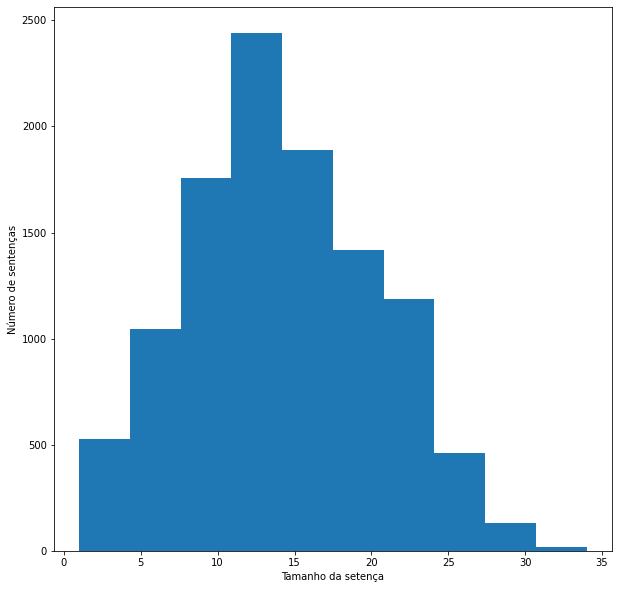

In [145]:
#Distribuilção das sentenças por quantidade de palavras 
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tamanho da setença') 
plt.ylabel('Número de sentenças') 
plt.hist(sentence_lengths, bins=10)
plt.show()

Podemos observar que a distribuição no tamanho das sentenças tende a normalidade. Essa característica é importante para evitar viés no processo de classificação quanto ao tamanho dos textos avaliados e a quantidade de palavras específicas em uma determinada sentença.

In [150]:
clean_questions.to_csv(f'{path}/trailhead/nlp/data/clean_questions.csv', index=False)